In [ ]:
import cdsapi

dataset = "reanalysis-era5-single-levels-monthly-means"
request = {
    "product_type": ["monthly_averaged_reanalysis"],
    "variable": [
        "2m_temperature",
        "total_precipitation",
        "evaporation",
        "potential_evaporation",
        "sub_surface_runoff",
        "surface_runoff",
        "soil_type",
        "volumetric_soil_water_layer_1",
        "volumetric_soil_water_layer_2",
        "volumetric_soil_water_layer_3",
        "volumetric_soil_water_layer_4",
        "leaf_area_index_high_vegetation",
        "leaf_area_index_low_vegetation"
    ],
    "year": [
        "2002", "2003", "2004",
        "2005", "2006", "2007",
        "2008", "2009", "2010",
        "2011", "2012", "2013",
        "2014", "2015", "2016",
        "2017", "2018", "2019",
        "2020", "2021", "2022",
        "2023", "2024", "2025"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "time": ["00:00"],
    "data_format": "netcdf",
    "download_format": "unarchived"
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()


In [1]:
#1
#bibliothikes
import xarray as xr #read NC files
import pandas as pd #φτιάχνει 2D πίνακες
import matplotlib.pyplot as plt #γραφήματα/χάρτες
import cartopy.crs as ccrs #γραφήματα/χάρτες
import cartopy.feature as cfeature #γραφήματα/χάρτες

In [ ]:
#2_Natasa
#datasets
CSR_path  = "H:/Karachles_thesis/data/CSR_GRACE_GRACE-FO_RL0603_Mascons_all-corrections.nc"
ERA_path1 = "H:/Karachles_thesis/data/data_stream-moda_stepType-avgad.nc"
ERA_path2 = "H:/Karachles_thesis/data/data_stream-moda_stepType-avgua.nc"


In [2]:
#2
#datasets
CSR_path = "C:/Users/akara/OneDrive/Desktop/DE_Karachles/data/CSR_GRACE_GRACE-FO_RL0603_Mascons_all-corrections.nc"
ERA_path1 = "C:/Users/akara/OneDrive/Desktop/DE_Karachles/data/ERA5_data/data_stream-moda_stepType-avgad.nc"
ERA_path2 = "C:/Users/akara/OneDrive/Desktop/DE_Karachles/data/ERA5_data/data_stream-moda_stepType-avgua.nc"

In [2]:
#2_new
#datasets
CSR_path = "C:/Users/akara/OneDrive/Desktop/DE_Karachles/data/CSR_GRACE_GRACE-FO_RL0603_Mascons_all-corrections.nc"
ERA_path1 = "C:/Users/akara/OneDrive/Desktop/DE_Karachles/programm/project_ML/ERA5_data_new/data_stream-moda_stepType-avgad.nc"
ERA_path2 = "C:/Users/akara/OneDrive/Desktop/DE_Karachles/programm/project_ML/ERA5_data_new/data_stream-moda_stepType-avgua.nc"

In [3]:
#3
# read-print dataset
ds = xr.open_dataset(CSR_path)
ds_era1 = xr.open_dataset(ERA_path1)
ds_era2 = xr.open_dataset(ERA_path2)
#print(ds.head())
#print(ds_era1.head())
#print(ds_era1.head())

In [4]:
#4
#slice
import numpy as np
import xarray as xr

print("Δώσε όρια περιοχής για slice latΕ[-90,90], lonΕ[-180,180]")
try:
    lat_min = float(input("Δώσε Latitude Min : "))
    lat_max = float(input("Δώσε Latitude Max : "))
    lon_min = float(input("Δώσε Longitude Min : "))
    lon_max = float(input("Δώσε Longitude Max : "))
except ValueError:
    print("Λάθος εισαγωγή! Δώσε νούμερο!")
print(f"\nΕπιλέχθηκε περιοχή: Lat[{lat_min}, {lat_max}], Lon[{lon_min}, {lon_max}]")

# Ορισμός συνάρτησης για slice
def slice_nc(ds, ds_name):

    possible_lat_names = ['lat', 'latitude']
    possible_lon_names = ['lon', 'longitude']
    
    lat_name = None
    lon_name = None

    print("Αναζήτηση ονομάτων ")
    for name in ds.coords:
        # Ελέγχουμε με .lower() για να πιάνουμε και 'Latitude' και 'latitude'
        if name.lower() in possible_lat_names:
            lat_name = name
        elif name.lower() in possible_lon_names:
            lon_name = name
    
    # Έλεγχος αν βρέθηκαν (ΕΚΤΟΣ της λούπας)
    if not lat_name or not lon_name:
        raise ValueError(f" ΣΦΑΛΜΑ: Δεν βρέθηκαν ονόματα για lat/lon στο {ds_name}")

    # Μετατροπή Longitude (0-360 -> -180,180) ---
    if ds[lon_name].max() > 180:
        print(" Μετατροπή Longitude σε -180,180")
        ds = ds.assign_coords({lon_name: (((ds[lon_name] + 180) % 360) - 180)})
    ds = ds.sortby(lon_name)

    # Πρέπει πρώτα να πάρουμε τις τιμές για να τις ελέγξουμε!
    lat_values = ds[lat_name].values  
    # Ελέγχω φθίνουσα η αύξουσα σειρά δεδομένων
    # Ερώτηση για Νατασα
    if lat_values[0] > lat_values[-1]: 
        lat_slice = slice(lat_max, lat_min)
    else:
        lat_slice = slice(lat_min, lat_max)

    # Τελικό Κόψιμο
    ds_sliced = ds.sel({
        lat_name: lat_slice, 
        lon_name: slice(lon_min, lon_max)
    })
    return ds_sliced

ds_grace_sliced = slice_nc(ds, "GRACE")
ds_era1_sliced = slice_nc(ds_era1, "ERA5_1")
ds_era2_sliced = slice_nc(ds_era2,"ERA5_2")
print(f"Πραγματοποιήθηκε περικοπή δεδομένων για περιοχή μελέτης: Lat[{lat_min}, {lat_max}], Lon[{lon_min}, {lon_max}] ")

Δώσε όρια περιοχής για slice latΕ[-90,90], lonΕ[-180,180]

Επιλέχθηκε περιοχή: Lat[-10.0, -5.0], Lon[-60.0, -55.0]
Αναζήτηση ονομάτων 
 Μετατροπή Longitude σε -180,180
Αναζήτηση ονομάτων 
 Μετατροπή Longitude σε -180,180
Αναζήτηση ονομάτων 
 Μετατροπή Longitude σε -180,180
Πραγματοποιήθηκε περικοπή δεδομένων για περιοχή μελέτης: Lat[-10.0, -5.0], Lon[-60.0, -55.0] 


In [5]:
#5
#print(ds_grace_sliced.head())
#print(ds_era1_sliced.head())
#print(ds_era2_sliced.head())

In [5]:
#6
#fix time grace
ds = ds_grace_sliced
ds["time"] = pd.to_datetime(
    ds.time.values, origin="2002-01-01", unit="D"
)

# διέγραψε τη στήλη 'time_bounds'. Χρησιμοποίησε τη συνάρτηση ds.drop_vars την παράμετρο errors="ignore" για να αποφύγεις σφάλματα αν η στήλη δεν υπάρχει
ds = ds.drop_vars("time_bounds", errors="ignore")
print(ds)

# Για διευκόλυνση θα μετατρεψουμε το nc αρχείο της grace σε pandas dataframe που ειναι σαν πινακας.
grace_df = ds.to_dataframe().reset_index()
print(grace_df.head())

# Θα βγάλουμε τωρα την μήνα και χρόνο απο το grace_df και θα τα βάλουμε σε νέες στήλες
grace_df["year"] = grace_df["time"].dt.year
grace_df["month"] = grace_df["time"].dt.month
print(grace_df.head()) 

<xarray.Dataset> Size: 399kB
Dimensions:        (time: 248, lat: 20, lon: 20)
Coordinates:
  * time           (time) datetime64[ns] 2kB 2002-04-18 ... 2025-08-16T12:00:00
  * lat            (lat) float32 80B -9.875 -9.625 -9.375 ... -5.375 -5.125
  * lon            (lon) float32 80B -59.88 -59.62 -59.38 ... -55.38 -55.12
Data variables:
    lwe_thickness  (time, lat, lon) float32 397kB ...
Attributes: (12/59)
    Conventions:                CF-1.6, ACDD-1.3, ISO 8601
    filename:                   netcdf/CSR_GRACE_GRACE-FO_RL0603_Mascons_all-...
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    title:                      CSR GRACE and GRACE-FO MASCON RL0603M
    subtitle:                   RL06.3 GRACE/GRACE-FO Total water storage wit...
    ...                         ...
    user_note_3:                Ellipsoidal correction has been applied. The ...
    user_note_4:                Thi

In [6]:
#7 
ds_era1 = ds_era1_sliced
ds_era2 = ds_era2_sliced
era5_df1 = ds_era1.to_dataframe().reset_index()
era5_df2 = ds_era2.to_dataframe().reset_index()

# Θα βγάλουμε τωρα την μήνα και χρόνο απο τα era και θα τα βάλουμε σε νέες στήλες
era5_df1["year"] = era5_df1["valid_time"].dt.year
era5_df1["month"] = era5_df1["valid_time"].dt.month
era5_df2["year"] = era5_df2["valid_time"].dt.year
era5_df2["month"] = era5_df2["valid_time"].dt.month
# Και θα μετονομασουμε τις στήλες longitude και latitude σε lon και lat για να ταιριάζουν με το grace_df
era5_df1 = era5_df1.rename(columns={"longitude": "lon", "latitude": "lat"})
era5_df2 = era5_df2.rename(columns={"longitude": "lon", "latitude": "lat"})

print(era5_df1.head())
print(era5_df2.head())

           valid_time  lat    lon        tp         e       pev      ssro  \
0 2002-01-01 06:00:00 -5.0 -60.00  0.009697 -0.004006 -0.001225  0.001449   
1 2002-01-01 06:00:00 -5.0 -59.75  0.010822 -0.003990  0.000017  0.001493   
2 2002-01-01 06:00:00 -5.0 -59.50  0.010931 -0.004000 -0.001672  0.001808   
3 2002-01-01 06:00:00 -5.0 -59.25  0.010504 -0.003953 -0.003643  0.002093   
4 2002-01-01 06:00:00 -5.0 -59.00  0.010395 -0.003805 -0.002499  0.002486   

        sro  number expver  year  month  
0  0.002971       0   0001  2002      1  
1  0.003621       0   0001  2002      1  
2  0.003555       0   0001  2002      1  
3  0.003354       0   0001  2002      1  
4  0.003341       0   0001  2002      1  
  valid_time  lat    lon         t2m  slt     swvl1     swvl2     swvl3  \
0 2002-01-01 -5.0 -60.00  299.573242  3.0  0.413913  0.415164  0.411531   
1 2002-01-01 -5.0 -59.75  299.334961  3.0  0.414875  0.416492  0.414903   
2 2002-01-01 -5.0 -59.50  299.229492  3.0  0.415607  0.41724

In [7]:
#8 
# #merge ERA5
# Τωρα έχουμε 3 πινακες (dataframes): grace_df, era5_df1, era5_df2 που περιέχουν τις μεταβλητές time, lon, lat, year, month και τις αντίστοιχες μετρήσεις.
# Επειδη τα era5_df1 και era5_df2 εχουν τις ιδιες διαστασεις και χρονο, μπορουμε να τα συγχωνευσουμε σε ενα πινακα (dataframe) με την συνάρτηση pd.merge() 
# χρησιμοποιώντας τις στήλες lon, lat, year, month ως κλειδιά (on=[])
era5_df = pd.merge(
    era5_df1,
    era5_df2,
    on=[ "lon", "lat", "year", "month"],
    how="inner"
)
era5_df2=era5_df.drop(columns=['valid_time_y', 'valid_time_x', 'number_x', 'number_y', 'expver_x', 'expver_y'])
print(era5_df2.head())

   lat    lon        tp         e       pev      ssro       sro  year  month  \
0 -5.0 -60.00  0.009697 -0.004006 -0.001225  0.001449  0.002971  2002      1   
1 -5.0 -59.75  0.010822 -0.003990  0.000017  0.001493  0.003621  2002      1   
2 -5.0 -59.50  0.010931 -0.004000 -0.001672  0.001808  0.003555  2002      1   
3 -5.0 -59.25  0.010504 -0.003953 -0.003643  0.002093  0.003354  2002      1   
4 -5.0 -59.00  0.010395 -0.003805 -0.002499  0.002486  0.003341  2002      1   

          t2m  slt     swvl1     swvl2     swvl3     swvl4    lai_hv    lai_lv  
0  299.573242  3.0  0.413913  0.415164  0.411531  0.382828  4.077271  0.654053  
1  299.334961  3.0  0.414875  0.416492  0.414903  0.391022  4.258789  0.000000  
2  299.229492  3.0  0.415607  0.417240  0.417466  0.399475  4.485718  1.057617  
3  299.176758  3.0  0.415943  0.417453  0.418809  0.400253  4.515869  2.715088  
4  298.991211  3.0  0.415043  0.415912  0.416078  0.399185  4.219849  2.114014  


In [8]:
#9
#Resolution Grace check
import numpy as np

g_lats = np.sort(grace_df["lat"].unique()) # .unique(): Πετάει τα διπλά δεδομένα
g_lons = np.sort(grace_df["lon"].unique())

dlat = np.diff(g_lats)
dlon = np.diff(g_lons)

step_lat = dlat[dlat > 0].min()
step_lon = dlon[dlon > 0].min()

step = float(min(step_lat, step_lon))
print("GRACE resolution ~", step, "degrees")

GRACE resolution ~ 0.25 degrees


In [9]:
#10
# regrid τα era5_df2 δεδομενα στην ιδια αναλυση με το grace_df χρησιμοποιώντας την τιμή step

grace_df["lat_r"] = (grace_df["lat"] / step).round() * step
grace_df["lon_r"] = (grace_df["lon"] / step).round() * step

era5_df2["lat_r"] = (era5_df2["lat"] / step).round() * step
era5_df2["lon_r"] = (era5_df2["lon"] / step).round() * step
print(grace_df.head())
print(era5_df2.head())

        time    lat     lon  lwe_thickness  year  month  lat_r  lon_r
0 2002-04-18 -9.875 -59.875       18.83238  2002      4  -10.0  -60.0
1 2002-04-18 -9.875 -59.625       20.30444  2002      4  -10.0  -59.5
2 2002-04-18 -9.875 -59.375       20.30444  2002      4  -10.0  -59.5
3 2002-04-18 -9.875 -59.125       20.30444  2002      4  -10.0  -59.0
4 2002-04-18 -9.875 -58.875       20.30444  2002      4  -10.0  -59.0
   lat    lon        tp         e       pev      ssro       sro  year  month  \
0 -5.0 -60.00  0.009697 -0.004006 -0.001225  0.001449  0.002971  2002      1   
1 -5.0 -59.75  0.010822 -0.003990  0.000017  0.001493  0.003621  2002      1   
2 -5.0 -59.50  0.010931 -0.004000 -0.001672  0.001808  0.003555  2002      1   
3 -5.0 -59.25  0.010504 -0.003953 -0.003643  0.002093  0.003354  2002      1   
4 -5.0 -59.00  0.010395 -0.003805 -0.002499  0.002486  0.003341  2002      1   

          t2m  slt     swvl1     swvl2     swvl3     swvl4    lai_hv  \
0  299.573242  3.0  0.41391

In [10]:
#11
# Final merge 
#χρησιμοποιώντας τις στήλες year, month, lat_r, lon_r ως κλειδιά

merged = pd.merge(
    grace_df,
    era5_df2,
    on=["year", "month", "lat_r", "lon_r"],
    how="inner",
    suffixes=("_grace", "_era")
)
#print(merged.head())
#Διωχνω τισ ημερομηνιες 2025 απο το Merged
merged= merged[merged['year'] <= 2024]
print(f"Μεγιστο έτος δεδομένων: {merged['year'].max()}")

data_out = ['time','lat_r','lat_era','lon_r','lon_era']
merged = merged.drop(columns = data_out, errors='ignore')

print(merged.tail())

Μεγιστο έτος δεδομένων: 2024
       lat_grace  lon_grace  lwe_thickness  year  month        tp         e  \
95995     -5.125    -56.125     -33.968792  2024     12  0.011637 -0.003918   
95996     -5.125    -55.875     -33.968792  2024     12  0.011637 -0.003918   
95997     -5.125    -55.625     -33.968792  2024     12  0.008310 -0.003660   
95998     -5.125    -55.375     -33.968792  2024     12  0.008310 -0.003660   
95999     -5.125    -55.125     -39.480255  2024     12  0.007040 -0.003506   

            pev      ssro       sro         t2m  slt     swvl1     swvl2  \
95995 -0.000471  0.000510  0.001529  299.488770  4.0  0.472344  0.470833   
95996 -0.000471  0.000510  0.001529  299.488770  4.0  0.472344  0.470833   
95997 -0.001527  0.000227  0.000873  299.279785  4.0  0.469353  0.462487   
95998 -0.001527  0.000227  0.000873  299.279785  4.0  0.469353  0.462487   
95999 -0.001942  0.000086  0.000648  299.484863  4.0  0.466103  0.453743   

          swvl3     swvl4    lai_hv    

In [11]:
#12
from sklearn.feature_selection import RFE
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
import sys

print("Δώσε μοντέλο ML που θες να χρησιμοποιήσεις: (XGBoost/RF)")
try:
    model_used = (input("Δώσε ML (XGBoost/RF): "))
except ValueError:
    print("Λάθος εισαγωγή!")
print(f"Η πρόγνωση θα πραγματοποιηθεί με το μοντέλο {model_used}")

# Διώχνω τις κενές εγγραφές
df_clean = merged.dropna()
y = df_clean["lwe_thickness"]

if model_used == "XGBoost":
    columns_to_select = ['tp', 'sro', 'ssro', 'e', 'swvl1', 'swvl2', 'swvl3', 'swvl4','pev','t2m','slt','lai_hv', 'lai_lv']
    x = df_clean.loc[:, columns_to_select]
    print(f"Features που θα αξιολογηθούν: {x.columns.to_list()}")
    model = xgb.XGBRegressor(objective="reg:squarederror",n_estimators=50, random_state=42, n_jobs=-1)

elif model_used == "RF":
    columns_to_select = ['tp', 'sro', 'ssro', 'e', 'swvl1', 'swvl2', 'swvl3', 'swvl4','pev','t2m','slt','lai_hv', 'lai_lv']
    x = df_clean.loc[:, columns_to_select]
    print(f"Features που θα αξιολογηθούν: {x.columns.to_list()}")
    model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
else:
    print("Δεν αναγνωρίστηκε το μοντέλο!")
    print("Τρέξε ξανά και γράψε 'XGBOOST' ή 'RF'.")
print("Επιλογή αριθμού καλύτερων χαρακτηριστικών.. ")
try: 
    n_features_to_select = int(input("Δώσε αριθμό χαρακτηριστικών: ")) 
    print(f"Η επιλογή RFE θα γίνει με: {n_features_to_select} χαρακτηριστικά")
except ValueError:
    print("Λάθος εισαγωγή δεδομένων!")
    sys.exit()

# Ο χρήστης επιλέγει με πόσα χαρακτηριστικά θέλει να γίνει το selection
rfe = RFE(estimator=model, n_features_to_select= n_features_to_select) 

rfe.fit(x, y)

# Βρίσκουμε ποιες στήλες επιλέχθηκαν (True)
selected_features = x.columns[rfe.support_].tolist()

print("\n Το RFE ολοκληρώθηκε!")
print(f" Τα {n_features_to_select} Καλύτερα Features (Φυσικές Παράμετροι) είναι:")
print(selected_features)

Δώσε μοντέλο ML που θες να χρησιμοποιήσεις: (XGBoost/RF)
Η πρόγνωση θα πραγματοποιηθεί με το μοντέλο XGBoost
Features που θα αξιολογηθούν: ['tp', 'sro', 'ssro', 'e', 'swvl1', 'swvl2', 'swvl3', 'swvl4', 'pev', 't2m', 'slt', 'lai_hv', 'lai_lv']
Επιλογή αριθμού καλύτερων χαρακτηριστικών.. 
Η επιλογή RFE θα γίνει με: 5 χαρακτηριστικά

 Το RFE ολοκληρώθηκε!
 Τα 5 Καλύτερα Features (Φυσικές Παράμετροι) είναι:
['tp', 'ssro', 'swvl3', 'swvl4', 'slt']


In [23]:
#13_tel
# RF_algorithm
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import joblib
#Φτιάχνω το τελικό Input "features"
x_final = x[selected_features]
print(f"Η εκπαίδευση του μοντέλου θα γίνει με: \n {x_final.head(1)}")
target = "lwe_thickness"
extra_features = ["year", "month", "lon_grace", "lat_grace"]
base_features = list(x_final.columns)
# Final feature list
features = base_features + extra_features
features = [col for col in features if col != target]
# Define X and y
X = merged[features]
y = merged[target]

# Μοιράζω τα δεδομένα
#80/20
X_train, X_test, y_train, y_test = train_test_split(
    x_final, y,
    test_size=0.2,
    random_state=42
)
if model_used == "XGBoost":
    print(" Εκκίνηση Tuning για XGBoost...")

    # 1. Το Πλέγμα Παραμέτρων (Ειδικά για XGBoost)
    param_grid = {
        'n_estimators': [100, 200],         # Αριθμός δέντρων
        'learning_rate': [0.05, 0.1, 0.2],  # Πόσο γρήγορα μαθαίνει (πολύ σημαντικό!)
        'max_depth': [3, 6, 10],            # Βάθος (συνήθως μικρότερο από RF)
        'subsample': [0.7, 0.8, 1.0],       # Πόσα δεδομένα βλέπει κάθε δέντρο (για overfitting)
        'colsample_bytree': [0.7, 0.8, 1.0] # Πόσα features βλέπει κάθε δέντρο
    }

    final_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

    kf = KFold(n_splits=3, shuffle=True, random_state=42)

    tuner = RandomizedSearchCV(
        final_model,
        param_distributions=param_grid,
        n_iter=10,                      # Δοκιμάζουμε 10 συνδυασμούς
        cv=kf,
        scoring="neg_mean_absolute_error",
        n_jobs=1,                       # Ασφάλεια μνήμης
        verbose=1,
        random_state=42
    )

    tuner.fit(X_train, y_train)
    best_params = tuner.best_params_
    print(" Best XGBoost Parameters:", best_params)

    best_model = xgb.XGBRegressor(
        **best_params,
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    )
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

elif model_used == "RF":
    param_grid = {
        'n_estimators': [100, 200],        # smaller, faster
        'max_depth': [10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', 'log2']
    }

    final_model = RandomForestRegressor(random_state=42, n_jobs=-1)
    kf = KFold(n_splits=3, shuffle=True, random_state=42)  # 3-FOLD → faster
    tuner = RandomizedSearchCV(
        final_model,
        param_distributions=param_grid,
        n_iter=10,                     # 10 randomized combos → HUGE speed gain
        cv=kf,
        scoring="neg_mean_absolute_error",
        n_jobs=1,
        verbose=1,
        random_state=42
    )

    # --- FIT TUNER (LIGHTWEIGHT) ---
    tuner.fit(X_train, y_train)
    best_params = tuner.best_params_
    print("Best Parameters:", best_params)

    # --- TRAIN FINAL MODEL WITH BEST PARAMS ---
    best_model = RandomForestRegressor(
        **best_params,
        random_state=42,
        n_jobs=-1
    )
    best_model.fit(X_train, y_train)

    # --- PREDICT ---
    y_pred = best_model.predict(X_test)

# Υπολογισμός Σφαλμάτων
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Root Mean Squared Error (σε cm)/ Πόσο απέχουν οι προβλέψεις από την πραγματικότητα
r2 = r2_score(y_test, y_pred) # R-squared (Ποσοστό επιτυχίας, max=1.0)
mae = mean_absolute_error(y_test, y_pred)
bias = np.mean(y_test - y_pred)

print(f" R² Score (Ακρίβεια): {r2:.4f}  (Άριστα = 1.0)")
print(f" RMSE (Σφάλμα):      {rmse:.4f} cm")
print(f" ΜΑΕ (Μέσο λάθος): {mae:.4f} ")
print(f" BIAS (Μεροληψία):   {bias:.4f} cm")

model_path = "C:/Users/akara/OneDrive/Desktop/DE_Karachles/programm/project_ML/results/model.pkl"
joblib.dump(best_model, model_path)


Η εκπαίδευση του μοντέλου θα γίνει με: 
    ssro     swvl2     swvl3           pev  lai_hv
0   0.0  0.000013 -0.000007  3.725290e-08     0.0
 Εκκίνηση Tuning για XGBoost...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
 Best XGBoost Parameters: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.7}
 R² Score (Ακρίβεια): 0.8481  (Άριστα = 1.0)
 RMSE (Σφάλμα):      0.8115 cm
 ΜΑΕ (Μέσο λάθος): 0.5102 
 BIAS (Μεροληψία):   0.0092 cm


['C:/Users/akara/OneDrive/Desktop/DE_Karachles/programm/project_ML/results/model.pkl']

In [ ]:
#14_Natasa
import joblib

model_path = "H:/Karachles_thesis/models/rf.pkl"
joblib.dump(best_model, model_path)

In [12]:
#14_Karachles
import joblib

model_path = "D:/random_forest_model_fast.pkl"
joblib.dump(best_model, model_path)

NameError: name 'best_model' is not defined

Η εκπαίδευση του μοντέλου θα γίνει με:
          tp  ssro         swvl4         t2m  slt
0  0.000439   0.0 -1.102908e-25  295.018188  0.0

Ξεκινά το tuning (σε υποσύνολο των δεδομένων)...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}

Υπολογισμός learning curves...
Trees:   10 | Train MAE: 1.8919 | Val MAE: 4.5032
Trees:   25 | Train MAE: 1.6794 | Val MAE: 4.2614
Trees:   40 | Train MAE: 1.6156 | Val MAE: 4.1893
Trees:   55 | Train MAE: 1.5795 | Val MAE: 4.1339
Trees:   71 | Train MAE: 1.5599 | Val MAE: 4.1133
Trees:   86 | Train MAE: 1.5480 | Val MAE: 4.0987
Trees:  101 | Train MAE: 1.5404 | Val MAE: 4.0883
Trees:  116 | Train MAE: 1.5345 | Val MAE: 4.0813
Trees:  132 | Train MAE: 1.5283 | Val MAE: 4.0761
Trees:  147 | Train MAE: 1.5227 | Val MAE: 4.0663
Trees:  162 | Train MAE: 1.5191 | Val MAE: 4.0611
Trees:  177 | Train MAE: 1.5175 | Val M

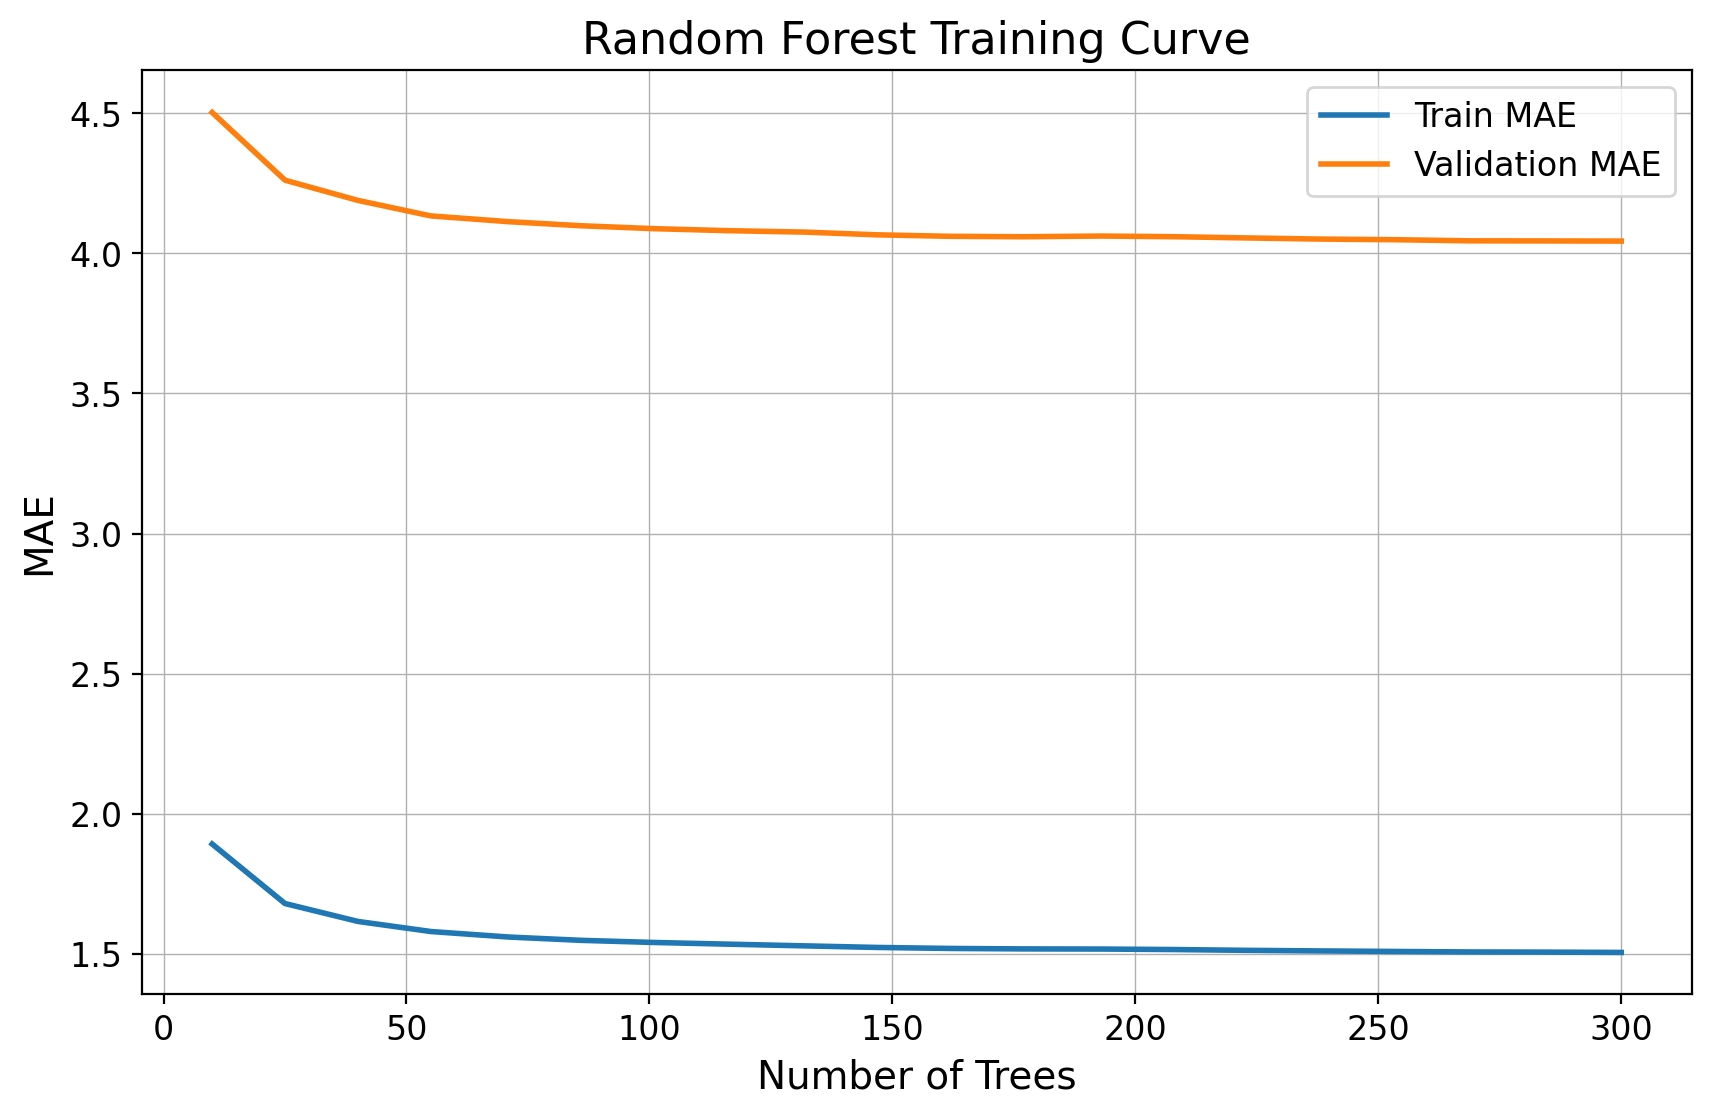


✅ Training curve saved to: C:/Users/akara/OneDrive/Desktop/DE_Karachles/programm/project_ML/results/random_forest_training_curve_fast.png

Εκπαίδευση τελικού μοντέλου στο πλήρες training set...

Αποτελέσματα στο test set:
 R² Score (Ακρίβεια): 0.9886
 RMSE (Σφάλμα):       2.2512 cm
 MAE (Μέσο λάθος):    1.1088
 BIAS (Μεροληψία):    -0.0055 cm

✅ Model saved as: D:/random_forest_model_fast.pkl


In [ ]:
#15
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

x_final = x[selected_features]
print("Η εκπαίδευση του μοντέλου θα γίνει με:\n", x_final.head(1))

target = "lwe_thickness"
extra_features = ["year", "month", "lon_grace", "lat_grace"]

base_features = list(x_final.columns)
features = base_features + extra_features
features = [col for col in features if col != target]

X = merged[features]
y = merged[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Παιρνω μέγιστο δείγμα δεδομένων 100κ
max_tuning_samples = 100000 #αν κρασσαρει, μειωσε το στα 50000

if len(X_train) > max_tuning_samples:
    X_tune = X_train.sample(n=max_tuning_samples, random_state=42)
    y_tune = y_train.loc[X_tune.index]
else:
    X_tune = X_train
    y_tune = y_train

X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_tune, y_tune, test_size=0.2, random_state=42
)

rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

kf = KFold(n_splits=3, shuffle=True, random_state=42) #n_splits : Πόσοι γύροι εκπαίδευσησ να γίνουν

#Ψάχνω τισ καλυτερες ρυθμίσεις για την εκπαίδευση
tuner = RandomizedSearchCV(
    rf_model,
    param_distributions=param_grid, #ρυθμίσεις που όρισα στο param_grid
    n_iter=10,   
    scoring='neg_mean_absolute_error',
    cv=kf, #Πάρε το split απο kf
    verbose=1,
    n_jobs=-1,
    random_state=42
)

print("\nΞεκινά το tuning (σε υποσύνολο των δεδομένων)...")
tuner.fit(X_train_sub, y_train_sub) #Κάνει το tuning για αυτα που ορισαμε πιο πανω
best_params = tuner.best_params_ # Αυτος με τα καλυτερα αποτελέσματα αποθηκεύεται 
print(f"\nBest Parameters: {best_params}")

#Μετά δουλεύω με αυτον που βγηκε καλύτερος 
max_trees = best_params['n_estimators']
curve_steps = np.unique(
    np.linspace(10, max_trees, num=min(max_trees // 10, 20), dtype=int)
)

rf_curves = RandomForestRegressor(
    random_state=42,
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    n_estimators=1,
    warm_start=True,
    n_jobs=-1
)

train_mae_list = []
val_mae_list = []
current_trees = 0

print("\nΥπολογισμός learning curves...")
for n_trees in curve_steps:
    rf_curves.n_estimators = int(n_trees)
    rf_curves.fit(X_train_sub, y_train_sub)

    y_train_pred = rf_curves.predict(X_train_sub)
    y_val_pred = rf_curves.predict(X_val)

    train_mae = mean_absolute_error(y_train_sub, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)

    train_mae_list.append(train_mae)
    val_mae_list.append(val_mae)

    print(f"Trees: {n_trees:4d} | Train MAE: {train_mae:.4f} | Val MAE: {val_mae:.4f}")


plt.figure(figsize=(10, 6), dpi=200)
plt.plot(curve_steps, train_mae_list, label='Train MAE', linewidth=2)
plt.plot(curve_steps, val_mae_list, label='Validation MAE', linewidth=2)
plt.xlabel('Number of Trees', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.title('Random Forest Training Curve', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linewidth=0.5)
#curve_path = "H:/Karachles_thesis/models/rf.pkl"
curve_path = "C:/Users/akara/OneDrive/Desktop/DE_Karachles/programm/project_ML/results/random_forest_training_curve_fast.png"
plt.savefig(curve_path, dpi=200)
plt.show()
print(f"\n Training curve saved to: {curve_path}")

# 6. ΤΕΛΙΚΗ ΕΚΠΑΙΔΕΥΣΗ ---
best_rf = RandomForestRegressor(
    random_state=42,
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    n_estimators=best_params['n_estimators'],
    n_jobs=-1
)

print("\nΕκπαίδευση τελικού μοντέλου στο πλήρες training set...")
best_rf.fit(X_train, y_train)


y_pred = best_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
bias = np.mean(y_test - y_pred)

print("\nΑποτελέσματα στο test set:")
print(f" R² Score (Ακρίβεια): {r2:.4f}")
print(f" RMSE (Σφάλμα):       {rmse:.4f} cm")
print(f" MAE (Μέσο λάθος):    {mae:.4f}")
print(f" BIAS (Μεροληψία):    {bias:.4f} cm")

#model_path = "H:/Karachles_thesis/models/rf.pkl"
model_path = "D:/random_forest_model_fast.pkl"
joblib.dump(best_rf, model_path)
print(f"\n Model saved as: {model_path}")


 ΕΚΚΙΝΗΣΗ XGBOOST ANALYSIS 
Η εκπαίδευση του μοντέλου θα γίνει με:
          tp      ssro     swvl3     swvl4  slt
0  0.003832  0.001679  0.455254  0.476822  4.0

 Ξεκινά το Tuning...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

 Best Parameters {'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 15, 'learning_rate': 0.1, 'colsample_bytree': 0.8}

Υπολογισμός learning curves για XGBoost (έως 500 δέντρα)...
Trees:   10 | Train MAE: 7.5813 | Val MAE: 7.7613
Trees:   35 | Train MAE: 1.0565 | Val MAE: 1.6289
Trees:   61 | Train MAE: 0.4934 | Val MAE: 1.1657
Trees:   87 | Train MAE: 0.3542 | Val MAE: 1.0535
Trees:  113 | Train MAE: 0.3059 | Val MAE: 1.0182
Trees:  138 | Train MAE: 0.2710 | Val MAE: 0.9944
Trees:  164 | Train MAE: 0.2467 | Val MAE: 0.9787
Trees:  190 | Train MAE: 0.2275 | Val MAE: 0.9663
Trees:  216 | Train MAE: 0.2125 | Val MAE: 0.9575
Trees:  242 | Train MAE: 0.1976 | Val MAE: 0.9493
Trees:  267 | Train MAE: 0.1873 | Val MAE: 0.9439
Trees:  293 | Tra

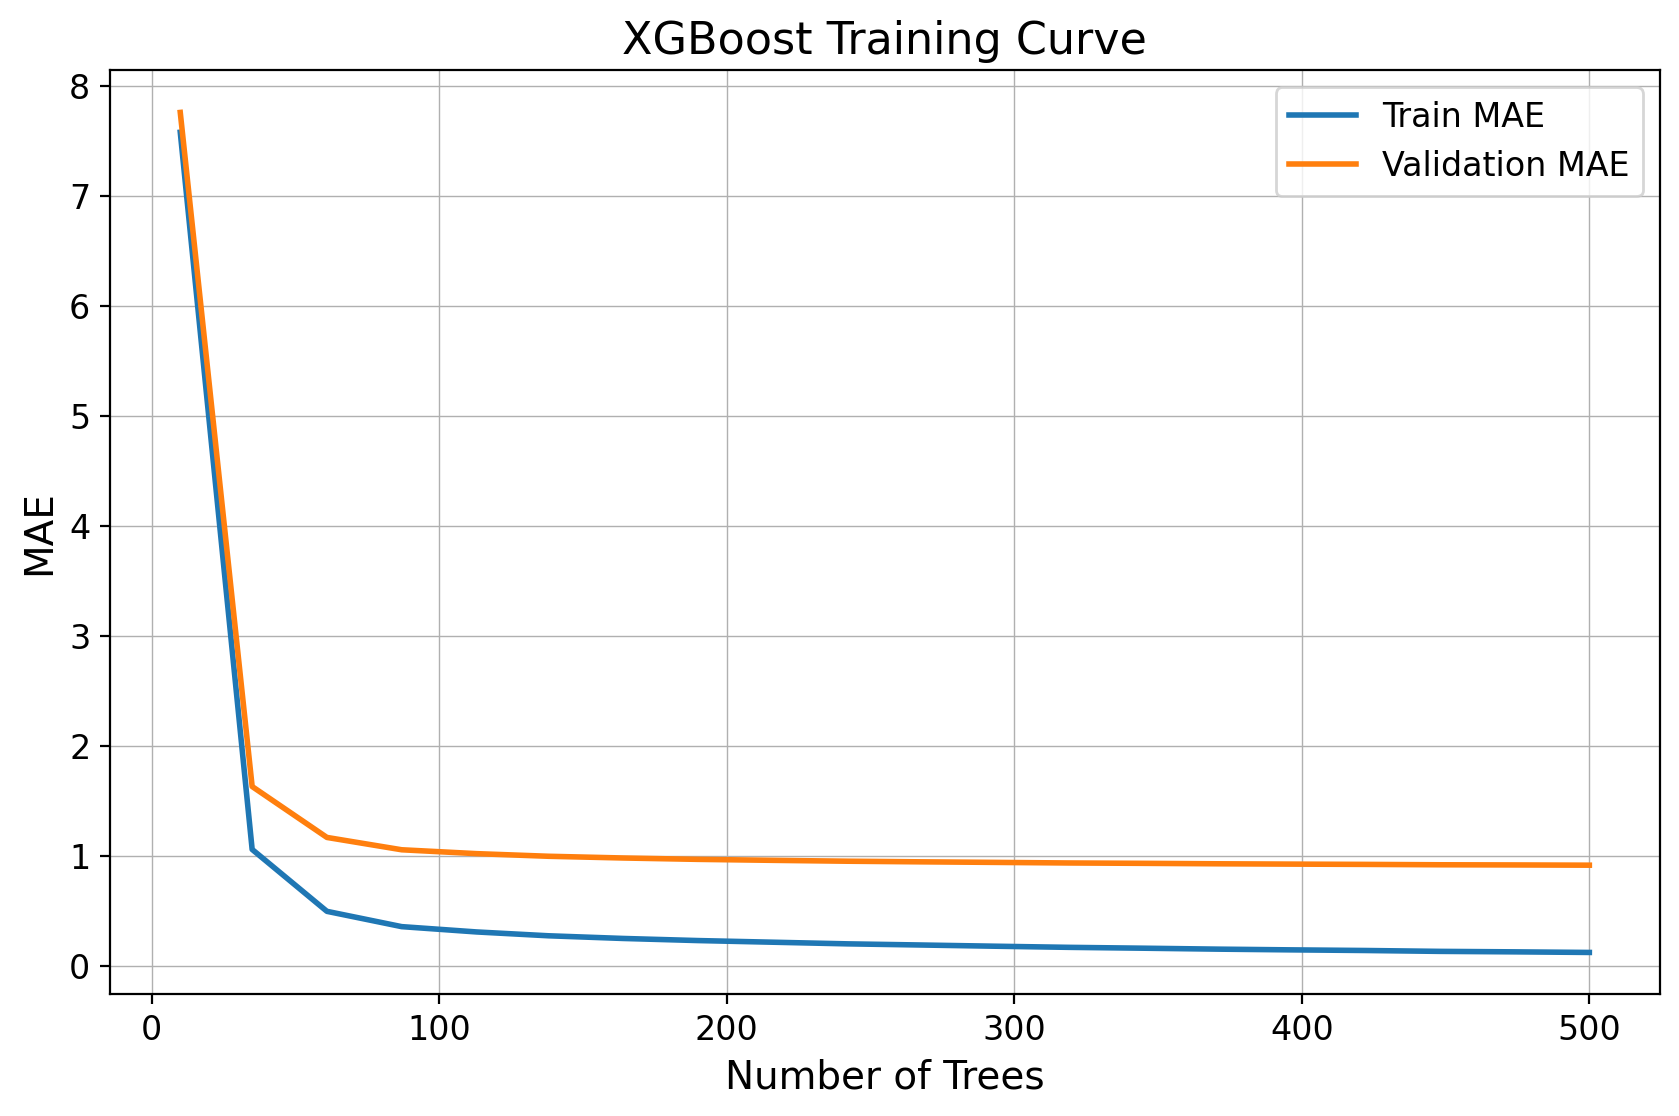

 Το γράφημα αποθηκεύτηκε: C:/Users/akara/OneDrive/Desktop/DE_Karachles/programm/project_ML/results/xgboost_curve.png

 Εκπαίδευση ΤΕΛΙΚΟΥ μοντέλου με 250 δέντρα...

 Αξιολόγηση στο Test Set...
------------------------------
 R² Score (Ακρίβεια): 0.9952
 RMSE (Σφάλμα):       1.6497 cm
 MAE (Μέσο λάθος):    0.7846 cm
 BIAS (Μεροληψία):    0.0066 cm
------------------------------


FileNotFoundError: [Errno 2] No such file or directory: 'D:/XGBoost_model_fast.pkl'

In [ ]:
#16
#XGB_learning curve
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

print(" ΕΚΚΙΝΗΣΗ XGBOOST ANALYSIS ")
x_final = x[selected_features]
print("Η εκπαίδευση του μοντέλου θα γίνει με:\n", x_final.head(1))

target = "lwe_thickness"
extra_features = ["year", "month", "lon_grace", "lat_grace"]

base_features = list(x_final.columns)
features = base_features + extra_features
features = [col for col in features if col != target]

X = merged[features]
y = merged[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

max_tuning_samples = 100000 

if len(X_train) > max_tuning_samples:
    print(f" Χρήση δείγματος {max_tuning_samples} για το Tuning...")
    X_tune = X_train.sample(n=max_tuning_samples, random_state=42)
    y_tune = y_train.loc[X_tune.index]
else:
    X_tune = X_train
    y_tune = y_train

X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_tune, y_tune, test_size=0.2, random_state=42
)
# Μέχρι εδώ ίδιο με RF

# tuning 
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=1)

param_grid = {
    'n_estimators': [100, 200, 500], #500
    'max_depth': [10, 15, 6], 
    'colsample_bytree': [0.7, 0.8, 1], #0.7,0.8,1
    'min_child_weight': [1, 3, 5], 
    'learning_rate': [0.01, 0.05, 0.1] #0.01,0.05,0.1
}

kf = KFold(n_splits=3, shuffle=True, random_state=42) #5

tuner = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_grid,
    n_iter=10,                      # Ίδιο με RF
    scoring='neg_mean_absolute_error', # Ίδιο με RF
    cv=kf,                          # Ίδιο με RF
    verbose=1,
    n_jobs=1,                      
    random_state=42
)

print("\n Ξεκινά το Tuning...")
tuner.fit(X_train_sub, y_train_sub)
best_params = tuner.best_params_
print(f"\n Best Parameters {best_params}")

# Παίρνουμε τον βέλτιστο αριθμό δέντρων που βρήκε το Tuning
max_trees = best_params['n_estimators']
curve_steps = np.unique(
    np.linspace(10, max_trees, num=min(max_trees // 10, 20), dtype=int)
)
# Λίστες για αποθήκευση αποτελεσμάτων
train_mae_list = []
val_mae_list = []

print(f"\nΥπολογισμός learning curves για XGBoost (έως {max_trees} δέντρα)")

for n_trees in curve_steps:
    # Δημιουργούμε ένα ΠΡΟΣΩΡΙΝΟ μοντέλο για αυτό το βήμα
    # Χρησιμοποιούμε ΟΛΕΣ τις best_params ΕΚΤΟΣ από το n_estimators (που το βάζουμε εμείς)
    
    # Φιλτράρουμε τις παραμέτρους για να βγάλουμε το 'n_estimators'
    params_without_n = {k: v for k, v in best_params.items() if k != 'n_estimators'}
    
    xgb_curves = xgb.XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1,             # Χρήση όλων των πυρήνων
        n_estimators=int(n_trees),  # Το τρέχον βήμα (π.χ. 10, 20, ...)
        **params_without_n     # Οι υπόλοιπες βέλτιστες ρυθμίσεις (learning_rate, depth κλπ)
    )
    
    # Εκπαίδευση στο υποσύνολο (sub)
    xgb_curves.fit(X_train_sub, y_train_sub)

    # Προβλέψεις
    y_train_pred = xgb_curves.predict(X_train_sub)
    y_val_pred = xgb_curves.predict(X_val)

    # Υπολογισμός Σφάλματος
    train_mae = mean_absolute_error(y_train_sub, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)

    # Αποθήκευση
    train_mae_list.append(train_mae)
    val_mae_list.append(val_mae)

    print(f"Trees: {n_trees:4d} | Train MAE: {train_mae:.4f} | Val MAE: {val_mae:.4f}")

# Γράφημα
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(curve_steps, train_mae_list, label='Train MAE', linewidth=2)
plt.plot(curve_steps, val_mae_list, label='Validation MAE', linewidth=2)
plt.xlabel('Number of Trees', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.title('XGBoost Training Curve', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linewidth=0.5)


# Αποθήκευση Γραφήματος
curve_path = "C:/Users/akara/OneDrive/Desktop/DE_Karachles/programm/project_ML/results/xgboost_curve.png"
#curve_path = "H:/Karachles_thesis/models/rf.pkl"
plt.savefig(curve_path, dpi=200)
plt.show()
print(f" Το γράφημα αποθηκεύτηκε: {curve_path}")

final_n_estimators = 350 # το αλλάζω βλέποντας το γράφημα 

print(f"\n Εκπαίδευση ΤΕΛΙΚΟΥ μοντέλου με {final_n_estimators} δέντρα...")

best_xgb = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    **{k: v for k, v in best_params.items() if k != 'n_estimators'}, # Κρατάμε learning_rate, depth κλπ
    n_estimators=final_n_estimators # Βάζουμε το δικό μας πλήθος δέντρων
)

best_xgb.fit(X_train, y_train)

# Αξιολόγηση
y_pred = best_xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
bias = np.mean(y_test - y_pred)

print("-" * 30)
print(f" R² Score (Ακρίβεια): {r2:.4f}")
print(f" RMSE (Σφάλμα):       {rmse:.4f} cm")
print(f" MAE (Μέσο λάθος):    {mae:.4f} cm")
print(f" BIAS (Μεροληψία):    {bias:.4f} cm")
print("-" * 30)

# Αποθήκευση μοντέλου
model_path = "D:/XGBoost_model_fast.pkl"
#model_path = "H:/Karachles_thesis/models/rf.pkl"
joblib.dump(best_xgb, model_path)
print(f" Το μοντέλο αποθηκεύτηκε: {model_path}")

Ετοιμασία χάρτη για τη μεταβλητή 'e' στις 2002-01-01 06:00...


c:\Users\akara\miniconda3\envs\grace_env\Lib\site-packages\cartopy\mpl\feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


 Raster plot saved as: C:/Users/akara/OneDrive/Desktop/DE_Karachles/programm/project_ML/maps/ERA5_evaporation.jpg


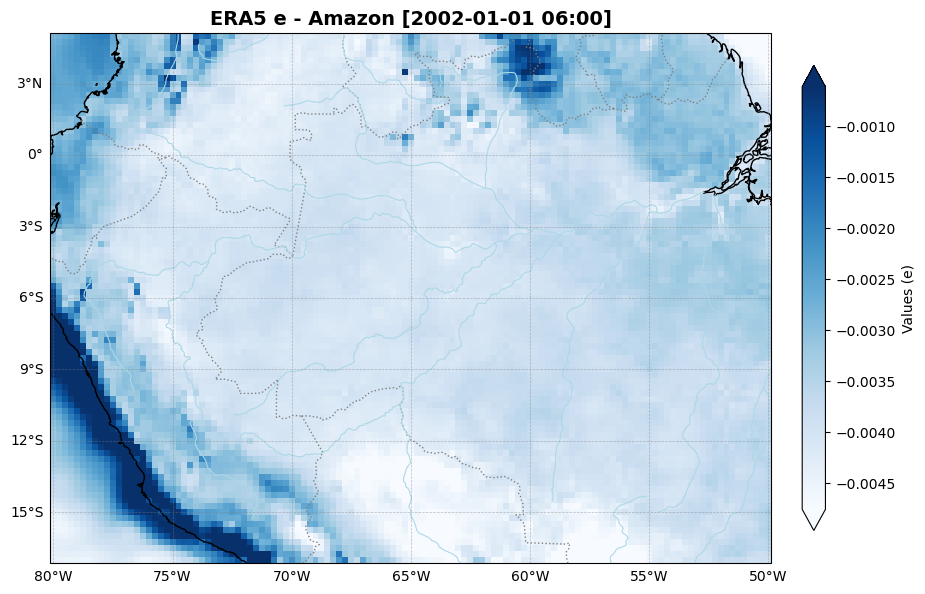

In [ ]:
#Maps_1
# evaporation (ERA5_1 dataset)

# 1. Ορίζουμε τη διαδρομή αποθήκευσης
output_jpg_era5 = "C:/Users/akara/OneDrive/Desktop/DE_Karachles/programm/project_ML/maps/ERA5_evaporation.jpg"
#output_jpg_era5 = "H:/Karachles_thesis/models/ERA5_evaporation.jpg"
# 2. Κάνω χάρτη για evaporation 
var_to_plot = 'e' 

try:
    map_year = int(input("Δώσε Έτος (π.χ. 2005): "))
    map_month = int(input("Δώσε Μήνα (1-12): "))
except ValueError:
    print("Λάθος εισαγωγή ημερομηνίας!")

# 3. Επιλογή Χρονικής Στιγμής
# Το ERA5 έχει πολλές χρονικές στιγμές. Πρέπει να διαλέξουμε ΜΙΑ για να φτιάξουμε 2D χάρτη.
# Ας διαλέξουμε την ΠΡΩΤΗ διαθέσιμη χρονική στιγμή για δοκιμή.
# (Το .isel(time=0) επιλέγει με βάση τη θέση, το πρώτο στοιχείο)
data_slice = ds_era1_sliced[var_to_plot].isel(valid_time=0)

# Εναλλακτικά, αν θες συγκεκριμένη ημερομηνία (αν υπάρχει στα δεδομένα σου):
# data_slice = ds_era1_sliced[var_to_plot].sel(time='2002-04-01', method='nearest')

# Παίρνουμε την ημερομηνία σε string για τον τίτλο
time_str = data_slice.valid_time.dt.strftime("%Y-%m-%d %H:00").item()

print(f"Ετοιμασία χάρτη για τη μεταβλητή '{var_to_plot}' στις {time_str}...")


#  Δημιουργία Figure 
plt.figure(figsize=(10, 8))

# Ορίζουμε την προβολή χάρτη (PlateCarree για lat/lon)
ax = plt.axes(projection=ccrs.PlateCarree())

# --- ΤΟ ΚΥΡΙΟ PLOT (Χρησιμοποιούμε xarray pcolormesh αντί για scatter) ---
# Το xarray αναλαμβάνει αυτόματα τις συντεταγμένες και το colorbar
plot = data_slice.plot.pcolormesh(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="Blues",     # Χρώματα: 'Blues' για βροχή, 'RdBu_r' για θερμοκρασία/εξάτμιση
    robust=True,      # Αυτόματο "κόψιμο" ακραίων τιμών για καλύτερη αντίθεση χρωμάτων
    cbar_kwargs={     # Ρυθμίσεις για το colorbar
        "orientation": "vertical",
        "fraction": 0.03,
        "pad": 0.04,
        "label": f"Values ({var_to_plot})" # Ετικέτα colorbar
    }
)
# --- Προσθήκη Χαρακτηριστικών Χάρτη ---
ax.coastlines(resolution="10m", color="black", linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=":", edgecolor='gray')
# Για τον Αμαζόνιο, ίσως θέλουμε να φαίνονται τα ποτάμια
ax.add_feature(cfeature.RIVERS, color='lightblue', linewidth=0.8)

# Προσθήκη γραμμών πλέγματος (gridlines) για lat/lon
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False   # Όχι ετικέτες πάνω
gl.right_labels = False # Όχι ετικέτες δεξιά
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}


# --- Τίτλοι και Αποθήκευση ---
# Ο τίτλος μπαίνει αυτόματα από το xarray, αλλά μπορούμε να τον αλλάξουμε:
ax.set_title(f"ERA5 {var_to_plot.lower()} - Amazon [{time_str}]", fontsize=14, fontweight='bold')

# Αφαίρεση των default labels του xarray γιατί βάλαμε gridlines
ax.set_xlabel("")
ax.set_ylabel("")

# Αποθήκευση
plt.savefig(output_jpg_era5, dpi=300, bbox_inches="tight")
print(f" Raster plot saved as: {output_jpg_era5}")

# Εμφάνιση
plt.show()

Ετοιμασία χάρτη για τη μεταβλητή 'lwe_thickness' στις 2002-04-18 00:00...


c:\Users\akara\miniconda3\envs\grace_env\Lib\site-packages\cartopy\mpl\feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


 Raster plot saved as: C:/Users/akara/OneDrive/Desktop/DE_Karachles/programm/project_ML/maps/GRACE_lwe.jpg


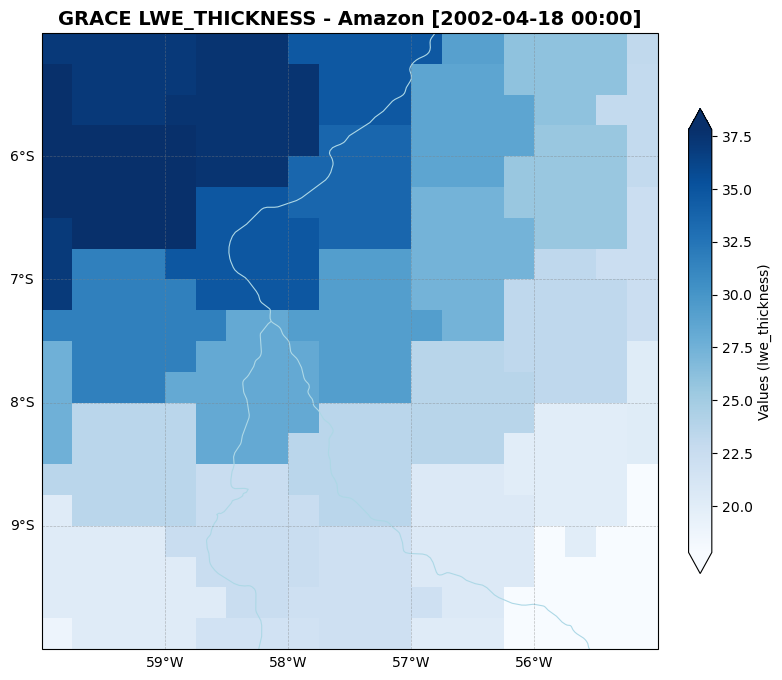

In [ ]:
# Maps_2
# lwe (Grace dataset)

# 1. Ορίζουμε τη διαδρομή αποθήκευσης
#output_jpg = "H:/Karachles_thesis/models/GRACE_lwe.jpg"
output_jpg = "C:/Users/akara/OneDrive/Desktop/DE_Karachles/programm/project_ML/maps/GRACE_lwe.jpg"
# 2. Κάνω χάρτη για evaporation 
var_to_plot = 'lwe_thickness' 

try:
    map_year = int(input("Δώσε Έτος (π.χ. 2005): "))
    map_month = int(input("Δώσε Μήνα (1-12): "))
except ValueError:
    print("Λάθος εισαγωγή ημερομηνίας!")

# 3. Επιλογή Χρονικής Στιγμής
# Το ERA5 έχει πολλές χρονικές στιγμές. Πρέπει να διαλέξουμε ΜΙΑ για να φτιάξουμε 2D χάρτη.
# Ας διαλέξουμε την ΠΡΩΤΗ διαθέσιμη χρονική στιγμή για δοκιμή.
# (Το .isel(time=0) επιλέγει με βάση τη θέση, το πρώτο στοιχείο)
data_slice = ds_grace_sliced[var_to_plot].isel(time=0)

# Εναλλακτικά, αν θες συγκεκριμένη ημερομηνία (αν υπάρχει στα δεδομένα σου):
# data_slice = ds_era1_sliced[var_to_plot].sel(time='2002-04-01', method='nearest')

# Παίρνουμε την ημερομηνία σε string για τον τίτλο
time_str = data_slice.time.dt.strftime("%Y-%m-%d %H:00").item()

print(f"Ετοιμασία χάρτη για τη μεταβλητή '{var_to_plot}' στις {time_str}...")

#  Δημιουργία Figure 
plt.figure(figsize=(10, 8))

# Ορίζουμε την προβολή χάρτη (PlateCarree για lat/lon)
ax = plt.axes(projection=ccrs.PlateCarree())

# --- ΤΟ ΚΥΡΙΟ PLOT (Χρησιμοποιούμε xarray pcolormesh αντί για scatter) ---
# Το xarray αναλαμβάνει αυτόματα τις συντεταγμένες και το colorbar
plot = data_slice.plot.pcolormesh(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="Blues",     # Χρώματα: 'Blues' για βροχή, 'RdBu_r' για θερμοκρασία/εξάτμιση
    robust=True,      # Αυτόματο "κόψιμο" ακραίων τιμών για καλύτερη αντίθεση χρωμάτων
    cbar_kwargs={     # Ρυθμίσεις για το colorbar
        "orientation": "vertical",
        "fraction": 0.03,
        "pad": 0.04,
        "label": f"Values ({var_to_plot})" # Ετικέτα colorbar
    }
)
# --- Προσθήκη Χαρακτηριστικών Χάρτη ---
ax.coastlines(resolution="10m", color="black", linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=":", edgecolor='gray')
# Για τον Αμαζόνιο, ίσως θέλουμε να φαίνονται τα ποτάμια
ax.add_feature(cfeature.RIVERS, color='lightblue', linewidth=0.8)

# Προσθήκη γραμμών πλέγματος (gridlines) για lat/lon
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False   # Όχι ετικέτες πάνω
gl.right_labels = False # Όχι ετικέτες δεξιά
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}


# --- Τίτλοι και Αποθήκευση ---
# Ο τίτλος μπαίνει αυτόματα από το xarray, αλλά μπορούμε να τον αλλάξουμε:
ax.set_title(f"GRACE {var_to_plot.upper()} - Amazon [{time_str}]", fontsize=14, fontweight='bold')

# Αφαίρεση των default labels του xarray γιατί βάλαμε gridlines
ax.set_xlabel("")
ax.set_ylabel("")

# Αποθήκευση
plt.savefig(output_jpg, dpi=300, bbox_inches="tight")
print(f" Raster plot saved as: {output_jpg}")

# Εμφάνιση
plt.show()

 Το μοντέλο φορτώθηκε: C:/Users/akara/OneDrive/Desktop/DE_Karachles/programm/project_ML/results/model.pkl


['lat_grace', 'lon_grace', 'lwe_thickness', 'year', 'month', 'tp', 'e', 'pev', 'ssro', 'sro', 't2m', 'slt', 'swvl1', 'swvl2', 'swvl3', 'swvl4', 'lai_hv', 'lai_lv']
 Γίνεται πρόβλεψη...


c:\Users\akara\miniconda3\envs\grace_env\Lib\site-packages\cartopy\mpl\feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


✅ Ο χάρτης αποθηκεύτηκε: C:/Users/akara/OneDrive/Desktop/DE_Karachles/programm/project_ML/maps/LWE_Pred_2022_05.jpg


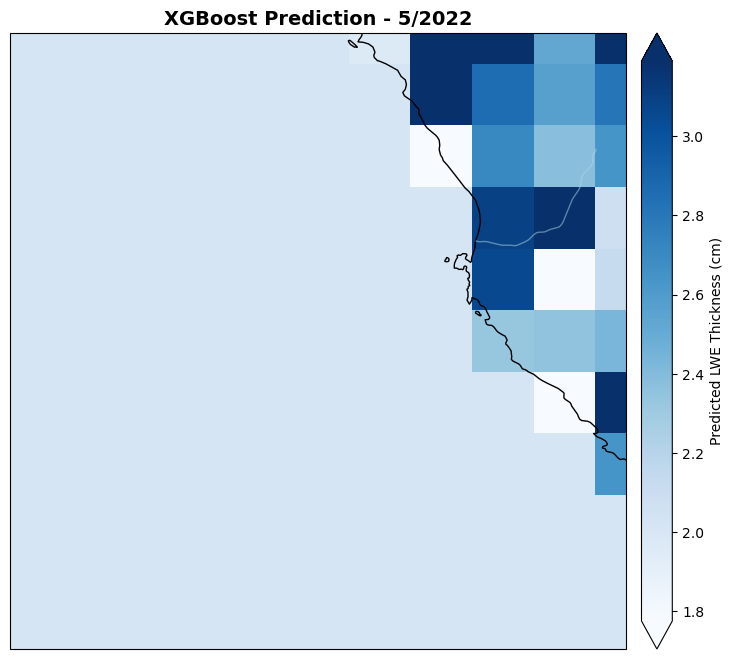

In [ ]:
# Maps_3
#Grace_XGBoost
import joblib

# 1. Φόρτωση και ανάγνωση pkl
model_path = "C:/Users/akara/OneDrive/Desktop/DE_Karachles/programm/project_ML/results/model.pkl" 

try:
    model = joblib.load(model_path)
    print(f" Το μοντέλο φορτώθηκε: {model_path}")
except FileNotFoundError:
    print(" ΣΦΑΛΜΑ: Το αρχείο .pkl δεν βρέθηκε!")
    model = None

if model is not None:
    # 2. Εισαγωγή Ημερομηνίας
    try:
        pred_year = int(input("Δώσε Έτος πρόβλεψης (π.χ. 2015): "))
        pred_month = int(input("Δώσε Μήνα πρόβλεψης (1-12): "))
    except ValueError:
        print(" Λάθος εισαγωγή!")
        sys.exit()

    # 3. Φιλτράρισμα Δεδομένων (ERA5 Inputs) από το merged
    # Χρησιμοποιούμε το merged που έχεις ήδη στη μνήμη
    input_data = merged[(merged['year'] == pred_year) & (merged['month'] == pred_month)].copy()

    if input_data.empty:
        print(f" Δεν υπάρχουν δεδομένα στο 'merged' για {pred_month}/{pred_year}.")
    else:
        # 4. Επιλογή Features (Αυτόματα)
        # Το XGBoost συνήθως θυμάται τα ονόματα των features. 
        # Αν όχι, χρησιμοποιούμε τη λίστα 'features' που είχαμε στο training.
        try:
            required_features = model.feature_names_in_
        except AttributeError:
            print(" Το μοντέλο δεν έχει αποθηκευμένα ονόματα features. Χρησιμοποιούμε τη λίστα 'features'.")
            required_features = features # Η μεταβλητή από το προηγούμενο κελί
        
        print(input_data.columns.tolist())

        # Επιλέγουμε μόνο τις στήλες που θέλει το μοντέλο
        X_pred = input_data[required_features]
        
        # 5. Πρόβλεψη
        print(" Γίνεται πρόβλεψη...")
        input_data['lwe_pred'] = model.predict(X_pred)
        
        # Προαιρετικά: Αποθήκευση σε CSV
        csv_path = f"C:/Users/akara/OneDrive/Desktop/DE_Karachles/programm/project_ML/results/pred_{pred_year}_{pred_month:02d}.csv"
        input_data.to_csv(csv_path, index=False) # Ξε-σχολίασέ το αν θες CSV
        
        # 6. Οπτικοποίηση (Visualization)
        plt.figure(figsize=(10, 8))
        ax = plt.axes(projection=ccrs.PlateCarree())

        # Μετατροπή σε Grid για σωστό χάρτη (pcolormesh είναι καλύτερο από scatter για χάρτες)
        ds_map = input_data.set_index(['lat_grace', 'lon_grace'])[['lwe_pred']].to_xarray()

        img = ds_map['lwe_pred'].plot.pcolormesh(
            ax=ax,
            transform=ccrs.PlateCarree(),
            cmap="Blues", # Κόκκινο/Μπλε για νερό
            robust=True,
            cbar_kwargs={"label": "Predicted LWE Thickness (cm)", "pad": 0.02}
        )

        ax.coastlines(resolution="10m", color="black", linewidth=1)
        ax.add_feature(cfeature.BORDERS, linestyle=":")
        ax.add_feature(cfeature.RIVERS, color='lightblue', alpha=0.5)

        plt.title(f"XGBoost Prediction - {pred_month}/{pred_year}", fontsize=14, fontweight='bold')
        
        # Αποθήκευση Εικόνας
        img_path = f"C:/Users/akara/OneDrive/Desktop/DE_Karachles/programm/project_ML/maps/LWE_Pred_{pred_year}_{pred_month:02d}.jpg"
        plt.savefig(img_path, dpi=300, bbox_inches="tight")
        print(f"✅ Ο χάρτης αποθηκεύτηκε: {img_path}")
        
        plt.show()

 Φόρτωση μοντέλου από: C:/Users/akara/OneDrive/Desktop/DE_Karachles/programm/project_ML/results/model.pkl


c:\Users\akara\miniconda3\envs\grace_env\Lib\site-packages\cartopy\mpl\feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\akara\miniconda3\envs\grace_env\Lib\site-packages\cartopy\mpl\feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


 Ο χάρτης αποθηκεύτηκε: C:/Users/akara/OneDrive/Desktop/DE_Karachles/programm/project_ML/maps/Grace_Actual_vs_Predicted.jpg


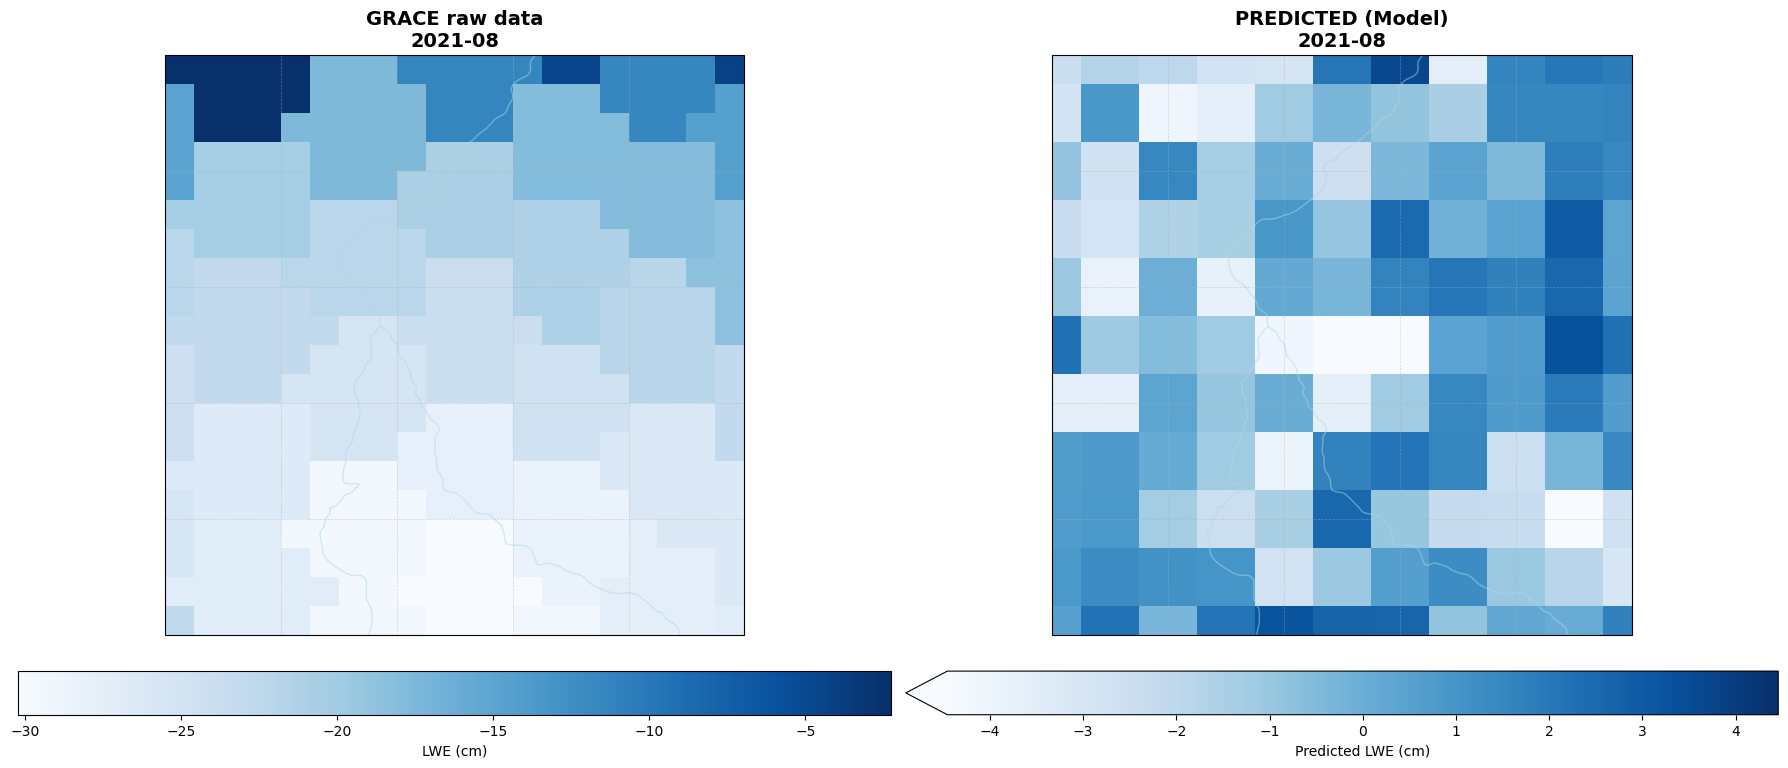

In [ ]:
# Maps_4
# Subplot raw-predict
import joblib
import sys

# Δημιουργώ paths και εισάγω το εκπαιδευμένο μοντέλο
output_jpg_sub = "C:/Users/akara/OneDrive/Desktop/DE_Karachles/programm/project_ML/maps/Grace_Actual_vs_Predicted.jpg"
model_path = "C:/Users/akara/OneDrive/Desktop/DE_Karachles/programm/project_ML/results/model.pkl"
#NATASA
#output_jpg_sub = "H:/Karachles_thesis/models/...../Grace_Actual_vs_Predicted.jpg"
#model_path = "H:/Karachles_thesis/models/...../.pkl"
var_to_plot = 'lwe_thickness'

# Εισαγωγή Ημερομηνίας από τον χρήστη
try:
    map_year = int(input("Δώσε Έτος (π.χ. 2005): "))
    map_month = int(input("Δώσε Μήνα (1-12): "))
except ValueError:
    print(" Λάθος εισαγωγή! Έξοδος.")
    sys.exit() # Τερματίζω το πρόγραμμα

# Φόρτωση Μοντέλου
print(f" Φόρτωση μοντέλου από: {model_path}")
try:
    model = joblib.load(model_path)
except FileNotFoundError:
    print(" ΣΦΑΛΜΑ: Το αρχείο .pkl δεν βρέθηκε!")
    sys.exit()

# Δεδομένα κάθε χάρτη

# Δεδομένα Grace αρχικά
target_date = f"{map_year}-{map_month:02d}" #:02d Θέλω στον μήνα να έχω 2 ψηφια αν γράψει 8 θα το κάνει 08 αυτόματα.
try:
    data_actual = ds_grace_sliced[var_to_plot].sel(time=target_date, method='nearest')
    time_str = data_actual.time.dt.strftime("%Y-%m").item()
except KeyError:
    print(f" Δεν βρέθηκαν δεδομένα GRACE για {map_month}/{map_year}")
    sys.exit()

# Δεδομένα Grace έπειτα από πρόβλεψη
input_data = merged[(merged['year'] == map_year) & (merged['month'] == map_month)].copy()

if input_data.empty:
    print(f" Δεν υπάρχουν δεδομένα ERA5 (merged) για {map_month}/{map_year}.")
    sys.exit()
else:
    # Εύρεση features
    try:
        required_features = model.feature_names_in_
    except AttributeError:
        print("Τα δεδομένα δεν βρέθηκαν στο μοντέλο χρησιμοποιώ τα default")
        required_features = features 
    
    # Πρόβλεψη
    # Ουσιαστικά εγώ εισάγωντας το μοντέλο και φορτώνοντας το κατευθύνω την πρόγνωση 
    # με βάση τα χαρακτηριστικά που έκανα το training
    X_pred = input_data[required_features]
    input_data['lwe_pred'] = model.predict(X_pred)
    
    # Μετατροπή σε Xarray για χάρτη
    ds_pred = input_data.set_index(['lat_grace', 'lon_grace'])[['lwe_pred']].to_xarray()
    data_predicted = ds_pred['lwe_pred']

# Φτιάχνουμε 1 εικόνα με 2 υπο-γραφήματα (ax1: Grace_raw, ax2:Grace_pred)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={'projection': ccrs.PlateCarree()})

#Μap_1
data_actual.plot.pcolormesh(
    ax=ax1,
    transform=ccrs.PlateCarree(),
    cmap="Blues", 
    robust=True,
    cbar_kwargs={"label": "LWE (cm)", "orientation": "horizontal", "pad": 0.05}
)
ax1.set_title(f"GRACE raw data\n{time_str}", fontsize=14, fontweight='bold')
ax1.coastlines(resolution="10m")
ax1.add_feature(cfeature.BORDERS, linestyle=":")
ax1.add_feature(cfeature.RIVERS, color='lightblue', alpha=0.5)
ax1.gridlines(draw_labels=False, linewidth=0.5, linestyle='--', alpha=0.5)

# Map_2
data_predicted.plot.pcolormesh(
    ax=ax2,
    transform=ccrs.PlateCarree(),
    cmap="Blues", 
    robust=True,
    cbar_kwargs={"label": "Predicted LWE (cm)", "orientation": "horizontal", "pad": 0.05}
)
ax2.set_title(f"PREDICTED (Model)\n{time_str}", fontsize=14, fontweight='bold')
ax2.coastlines(resolution="10m")
ax2.add_feature(cfeature.BORDERS, linestyle=":")
ax2.add_feature(cfeature.RIVERS, color='lightblue', alpha=0.5)
ax2.gridlines(draw_labels=False, linewidth=0.5, linestyle='--', alpha=0.5)

# Αποθήκευση
plt.tight_layout()
plt.savefig(output_jpg_sub, dpi=300, bbox_inches="tight")
print(f" Ο χάρτης αποθηκεύτηκε: {output_jpg_sub}")

plt.show()